**What You're Aiming For**

- In this checkpoint, we are going to work on the 'Expresso churn' dataset that was provided as part of Expresso Churn Prediction Challenge hosted by Zindi platform.

**Dataset description:** Expresso is an African telecommunications services company that provides telecommunication services in two African markets: Mauritania and Senegal. The data describes 2.5 million Expresso clients with more than 15 behaviour variables in order to predict the clients' churn probability.

**Instructions**

- Install the necessary packages
- Import you data and perform basic data exploration phase
- Display general information about the dataset
- Create a pandas profiling reports to gain insights into the dataset
- Handle Missing and corrupted values
- Remove duplicates, if they exist
- Handle outliers, if they exist
- Encode categorical features
- Based on the previous data exploration train and test a machine learning classifier
- Create a streamlit application (locally)
- Add input fields for your features and a validation button at the end of the form
- Import your ML model into the streamlit application and start making predictions given the provided features values

In [1]:
# import all necessary libraries
import numpy as np
import pandas as pd

# for visuals
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go

# ggplot style sheet
plt.style.use('ggplot')

import warnings
warnings.filterwarnings('ignore')

In [2]:
# read csv file
df = pd.read_csv(r"C:\Users\josep\OneDrive\Desktop\Datasets\Expresso_churn_dataset.csv")
df.head()

,user_id,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK,CHURN
0,00000bfd7d50f01092811bc0c8d7b0d6fe7c3596,FATICK,K > 24 month,4250.0,15.0,4251.0,1417.0,17.0,4.0,388.0,46.0,1.0,1.0,2.0,NO,54,On net 200F=Unlimited _call24H,8.0,0
1,00000cb4a5d760de88fecb38e2f71b7bec52e834,NaN,I 18-21 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,4,NaN,NaN,1
2,00001654a9d9f96303d9969d0a4a851714a4bb57,NaN,K > 24 month,3600.0,2.0,1020.0,340.0,2.0,NaN,90.0,46.0,7.0,NaN,NaN,NO,17,On-net 1000F=10MilF;10d,1.0,0
3,00001dd6fa45f7ba044bd5d84937be464ce78ac2,DAKAR,K > 24 month,13500.0,15.0,13502.0,4501.0,18.0,43804.0,41.0,102.0,2.0,NaN,NaN,NO,62,"Data:1000F=5GB,7d",11.0,0
4,000028d9e13a595abe061f9b58f3d76ab907850f,DAKAR,K > 24 month,1000.0,1.0,985.0,328.0,1.0,NaN,39.0,24.0,NaN,NaN,NaN,NO,11,Mixt 250F=Unlimited_call24H,2.0,0


In [3]:
# dataset shape
df.shape

(2154048, 19)

In [4]:
# dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2154048 entries, 0 to 2154047
Data columns (total 19 columns):
 #   Column          Dtype  
---  ------          -----  
 0   user_id         object 
 1   REGION          object 
 2   TENURE          object 
 3   MONTANT         float64
 4   FREQUENCE_RECH  float64
 5   REVENUE         float64
 6   ARPU_SEGMENT    float64
 7   FREQUENCE       float64
 8   DATA_VOLUME     float64
 9   ON_NET          float64
 10  ORANGE          float64
 11  TIGO            float64
 12  ZONE1           float64
 13  ZONE2           float64
 14  MRG             object 
 15  REGULARITY      int64  
 16  TOP_PACK        object 
 17  FREQ_TOP_PACK   float64
 18  CHURN           int64  
dtypes: float64(12), int64(2), object(5)
memory usage: 312.2+ MB


In [5]:
# checking for missing values
df.isnull().sum()

user_id                 0
REGION             849299
TENURE                  0
MONTANT            756739
FREQUENCE_RECH     756739
REVENUE            726048
ARPU_SEGMENT       726048
FREQUENCE          726048
DATA_VOLUME       1060433
ON_NET             786675
ORANGE             895248
TIGO              1290016
ZONE1             1984327
ZONE2             2017224
MRG                     0
REGULARITY              0
TOP_PACK           902594
FREQ_TOP_PACK      902594
CHURN                   0
dtype: int64

In [6]:
# summary statistics of the data
df.describe().astype('int')

,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,REGULARITY,FREQ_TOP_PACK,CHURN
count,1397309,1397309,1428000,1428000,1428000,1093615,1367373,1258800,864032,169721,136824,2154048,1251454,2154048
mean,5532,11,5510,1836,13,3366,277,95,23,8,7,28,9,0
std,7111,13,7187,2395,14,13304,872,204,63,41,33,22,12,0
min,10,1,1,0,1,0,0,0,0,0,0,1,1,0
25%,1000,2,1000,333,3,0,5,7,2,0,0,6,2,0
50%,3000,7,3000,1000,9,257,27,29,6,1,2,24,5,0
75%,7350,16,7368,2456,20,2895,156,99,20,3,5,51,12,0
max,470000,133,532177,177392,91,1823866,50809,21323,4174,4792,3697,62,713,1


In [7]:
# extract the numerical columns from the dataset
num_vars = df.select_dtypes(include=['int64', 'float64'])

# confirm if there are negative for each columns
num_vars_negative = (num_vars < 0).sum()

print(num_vars_negative)

MONTANT           0
FREQUENCE_RECH    0
REVENUE           0
ARPU_SEGMENT      0
FREQUENCE         0
DATA_VOLUME       0
ON_NET            0
ORANGE            0
TIGO              0
ZONE1             0
ZONE2             0
REGULARITY        0
FREQ_TOP_PACK     0
CHURN             0
dtype: int64


In [8]:
# extract the numerical columns from the dataset
num_vars = df.select_dtypes(include=np.number)
num_vars_list = num_vars.columns.tolist()
print(num_vars_list)

['MONTANT', 'FREQUENCE_RECH', 'REVENUE', 'ARPU_SEGMENT', 'FREQUENCE', 'DATA_VOLUME', 'ON_NET', 'ORANGE', 'TIGO', 'ZONE1', 'ZONE2', 'REGULARITY', 'FREQ_TOP_PACK', 'CHURN']


In [9]:
# extract the categorical columns from the dataset
cat_vars = df.select_dtypes(include='object')
cat_vars_list = cat_vars.columns.tolist()
print(cat_vars_list)

['user_id', 'REGION', 'TENURE', 'MRG', 'TOP_PACK']


In [10]:
# Replacing missing values for numerical columns
cols_to_fill = ['MONTANT', 'FREQUENCE_RECH', 'REVENUE', 'ARPU_SEGMENT', 'FREQUENCE', 'DATA_VOLUME', 'ON_NET', 'ORANGE', 
                'TIGO', 'ZONE1', 'ZONE2', 'REGULARITY', 'FREQ_TOP_PACK', 'CHURN']

df[cols_to_fill] = df[cols_to_fill].fillna(df[cols_to_fill].median())

In [11]:
cols_to_fill = ['user_id', 'REGION', 'TENURE', 'MRG', 'TOP_PACK']

for col in cols_to_fill:
    df[col].fillna(df[col].mode()[0], inplace=True)

In [12]:
df.isnull().sum()

user_id           0
REGION            0
TENURE            0
MONTANT           0
FREQUENCE_RECH    0
REVENUE           0
ARPU_SEGMENT      0
FREQUENCE         0
DATA_VOLUME       0
ON_NET            0
ORANGE            0
TIGO              0
ZONE1             0
ZONE2             0
MRG               0
REGULARITY        0
TOP_PACK          0
FREQ_TOP_PACK     0
CHURN             0
dtype: int64

In [13]:
df

,user_id,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK,CHURN
0,00000bfd7d50f01092811bc0c8d7b0d6fe7c3596,FATICK,K > 24 month,4250.0,15.0,4251.0,1417.0,17.0,4.0,388.0,46.0,1.0,1.0,2.0,NO,54,On net 200F=Unlimited _call24H,8.0,0
1,00000cb4a5d760de88fecb38e2f71b7bec52e834,DAKAR,I 18-21 month,3000.0,7.0,3000.0,1000.0,9.0,257.0,27.0,29.0,6.0,1.0,2.0,NO,4,All-net 500F=2000F;5d,5.0,1
2,00001654a9d9f96303d9969d0a4a851714a4bb57,DAKAR,K > 24 month,3600.0,2.0,1020.0,340.0,2.0,257.0,90.0,46.0,7.0,1.0,2.0,NO,17,On-net 1000F=10MilF;10d,1.0,0
3,00001dd6fa45f7ba044bd5d84937be464ce78ac2,DAKAR,K > 24 month,13500.0,15.0,13502.0,4501.0,18.0,43804.0,41.0,102.0,2.0,1.0,2.0,NO,62,"Data:1000F=5GB,7d",11.0,0
4,000028d9e13a595abe061f9b58f3d76ab907850f,DAKAR,K > 24 month,1000.0,1.0,985.0,328.0,1.0,257.0,39.0,24.0,6.0,1.0,2.0,NO,11,Mixt 250F=Unlimited_call24H,2.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2154043,ffffe85215ddc71a84f95af0afb0deeea90e6967,DAKAR,K > 24 month,3000.0,7.0,3000.0,1000.0,9.0,257.0,27.0,29.0,6.0,1.0,2.0,NO,6,All-net 500F=2000F;5d,5.0,0
2154044,ffffeaaa9289cdba0ac000f0ab4b48f4aa74ed15,THIES,K > 24 month,6100.0,15.0,5800.0,1933.0,15.0,621.0,26.0,40.0,40.0,1.0,2.0,NO,55,"Data: 200 F=100MB,24H",9.0,0
2154045,fffff172fda1b4bb38a95385951908bb92379809,DAKAR,K > 24 month,3000.0,7.0,3000.0,1000.0,9.0,257.0,27.0,29.0,6.0,1.0,2.0,NO,1,All-net 500F=2000F;5d,5.0,1
2154046,fffff5911296937a37f09a37a549da2e0dad6dbb,THIES,K > 24 month,10000.0,11.0,7120.0,2373.0,13.0,257.0,0.0,140.0,13.0,1.0,2.0,NO,28,All-net 500F=2000F;5d,12.0,0


## 30% Sample of the Dataset

In [14]:
# Select 30% of the dataset as a random sample
sampled_df = df.sample(frac=0.2, random_state=1)
sampled_df

,user_id,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK,CHURN
417912,31b5df7ba3046cac8e112ac2685f83a713ba586e,LOUGA,K > 24 month,37000.0,21.0,38098.0,12699.0,26.0,1813.0,1323.0,1164.0,178.0,1.0,2.0,NO,62,All-net 500F=2000F;5d,33.0,0
1380278,a4164c3fdcc4a70ce9b94977b1f8ef0dada865fe,THIES,K > 24 month,3500.0,7.0,3500.0,1167.0,7.0,257.0,30.0,90.0,7.0,1.0,2.0,NO,23,All-net 500F=2000F;5d,7.0,0
657158,4e1a8b1565797c463f12f0e444b06ce88319201e,DAKAR,K > 24 month,3000.0,7.0,3000.0,1000.0,9.0,257.0,27.0,29.0,6.0,1.0,2.0,NO,24,All-net 500F=2000F;5d,5.0,1
228934,1b47a7dce1c180ea7a8913736d8ac3f6eeccf66e,DAKAR,I 18-21 month,3000.0,7.0,3000.0,1000.0,9.0,257.0,27.0,29.0,6.0,1.0,2.0,NO,1,All-net 500F=2000F;5d,5.0,1
2020145,f016300be64a754ee497fa603425aa3ceb78ed51,FATICK,K > 24 month,18100.0,16.0,18100.0,6033.0,17.0,257.0,361.0,195.0,3.0,1.0,2.0,NO,53,All-net 1000=5000;5d,17.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1261773,9601b8400df8e4d3010dc10e9f39f012e0bf5494,DAKAR,K > 24 month,3000.0,7.0,3000.0,1000.0,9.0,257.0,4.0,29.0,6.0,1.0,2.0,NO,11,All-net 500F=2000F;5d,5.0,0
494205,3abfb582c3f30f39a2f1bc67f6f1ae114597b9b5,DAKAR,K > 24 month,3000.0,7.0,3000.0,1000.0,9.0,257.0,27.0,29.0,6.0,1.0,2.0,NO,25,All-net 500F=2000F;5d,5.0,1
1288545,9931233dcadcd24d30238d40eaa72fbfa95a8b38,DAKAR,K > 24 month,3000.0,7.0,3000.0,1000.0,9.0,71.0,27.0,29.0,6.0,1.0,2.0,NO,13,All-net 500F=2000F;5d,5.0,0
391519,2e8bc916030eb4468bc4df738f7a4c8e730a6988,THIES,K > 24 month,3000.0,7.0,3000.0,1000.0,9.0,257.0,27.0,29.0,6.0,1.0,2.0,NO,11,All-net 500F=2000F;5d,5.0,0


In [15]:
sampled_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 430810 entries, 417912 to 245290
Data columns (total 19 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   user_id         430810 non-null  object 
 1   REGION          430810 non-null  object 
 2   TENURE          430810 non-null  object 
 3   MONTANT         430810 non-null  float64
 4   FREQUENCE_RECH  430810 non-null  float64
 5   REVENUE         430810 non-null  float64
 6   ARPU_SEGMENT    430810 non-null  float64
 7   FREQUENCE       430810 non-null  float64
 8   DATA_VOLUME     430810 non-null  float64
 9   ON_NET          430810 non-null  float64
 10  ORANGE          430810 non-null  float64
 11  TIGO            430810 non-null  float64
 12  ZONE1           430810 non-null  float64
 13  ZONE2           430810 non-null  float64
 14  MRG             430810 non-null  object 
 15  REGULARITY      430810 non-null  int64  
 16  TOP_PACK        430810 non-null  object 
 17  FREQ_TOP_P

In [16]:
sampled_df.isnull().sum()

user_id           0
REGION            0
TENURE            0
MONTANT           0
FREQUENCE_RECH    0
REVENUE           0
ARPU_SEGMENT      0
FREQUENCE         0
DATA_VOLUME       0
ON_NET            0
ORANGE            0
TIGO              0
ZONE1             0
ZONE2             0
MRG               0
REGULARITY        0
TOP_PACK          0
FREQ_TOP_PACK     0
CHURN             0
dtype: int64

## Data Validation

In [17]:
# select the numerical variables
print(num_vars)

# value counts for numerical variables
for column in num_vars:
    print(df[column].value_counts())

         MONTANT  FREQUENCE_RECH  REVENUE  ARPU_SEGMENT  FREQUENCE  \
0         4250.0            15.0   4251.0        1417.0       17.0   
1            NaN             NaN      NaN           NaN        NaN   
2         3600.0             2.0   1020.0         340.0        2.0   
3        13500.0            15.0  13502.0        4501.0       18.0   
4         1000.0             1.0    985.0         328.0        1.0   
...          ...             ...      ...           ...        ...   
2154043      NaN             NaN      NaN           NaN        NaN   
2154044   6100.0            15.0   5800.0        1933.0       15.0   
2154045      NaN             NaN      NaN           NaN        NaN   
2154046  10000.0            11.0   7120.0        2373.0       13.0   
2154047      NaN             NaN      NaN           NaN        NaN   

         DATA_VOLUME  ON_NET  ORANGE  TIGO  ZONE1  ZONE2  REGULARITY  \
0                4.0   388.0    46.0   1.0    1.0    2.0          54   
1              

In [18]:
# select the categorical variables
cat_vars = df.select_dtypes(include=['object'])
print(cat_vars)

# value counts for categorical variables
for column in cat_vars:
    print(df[column].value_counts())

                                          user_id  REGION         TENURE MRG  \
0        00000bfd7d50f01092811bc0c8d7b0d6fe7c3596  FATICK   K > 24 month  NO   
1        00000cb4a5d760de88fecb38e2f71b7bec52e834   DAKAR  I 18-21 month  NO   
2        00001654a9d9f96303d9969d0a4a851714a4bb57   DAKAR   K > 24 month  NO   
3        00001dd6fa45f7ba044bd5d84937be464ce78ac2   DAKAR   K > 24 month  NO   
4        000028d9e13a595abe061f9b58f3d76ab907850f   DAKAR   K > 24 month  NO   
...                                           ...     ...            ...  ..   
2154043  ffffe85215ddc71a84f95af0afb0deeea90e6967   DAKAR   K > 24 month  NO   
2154044  ffffeaaa9289cdba0ac000f0ab4b48f4aa74ed15   THIES   K > 24 month  NO   
2154045  fffff172fda1b4bb38a95385951908bb92379809   DAKAR   K > 24 month  NO   
2154046  fffff5911296937a37f09a37a549da2e0dad6dbb   THIES   K > 24 month  NO   
2154047  fffff6dbff1508ea2bfe814e5ab2729ce6b788c2   DAKAR   K > 24 month  NO   

                               TOP_PACK

## Encode Categorical Features

In [19]:
from sklearn.preprocessing import LabelEncoder

# Assuming 'Data' is your dataframe
columns_to_encode=['user_id', 'REGION', 'TENURE', 'MRG', 'TOP_PACK']

# create a label encoder instance
label_encoder=LabelEncoder()

# Apply label encoding to each categorical column
for column in columns_to_encode:
    sampled_df[column]=label_encoder.fit_transform(sampled_df[column])

# Display the updated Dataframe
print(sampled_df.head())

         user_id  REGION  TENURE  MONTANT  FREQUENCE_RECH  REVENUE  \
417912     83471       7       7  37000.0            21.0  38098.0   
1380278   276140      12       7   3500.0             7.0   3500.0   
657158    131213       0       7   3000.0             7.0   3000.0   
228934     45624       0       5   3000.0             7.0   3000.0   
2020145   404362       2       7  18100.0            16.0  18100.0   

         ARPU_SEGMENT  FREQUENCE  DATA_VOLUME  ON_NET  ORANGE   TIGO  ZONE1  \
417912        12699.0       26.0       1813.0  1323.0  1164.0  178.0    1.0   
1380278        1167.0        7.0        257.0    30.0    90.0    7.0    1.0   
657158         1000.0        9.0        257.0    27.0    29.0    6.0    1.0   
228934         1000.0        9.0        257.0    27.0    29.0    6.0    1.0   
2020145        6033.0       17.0        257.0   361.0   195.0    3.0    1.0   

         ZONE2  MRG  REGULARITY  TOP_PACK  FREQ_TOP_PACK  CHURN  
417912     2.0    0          62       

In [20]:
# wite a code for the 'CHURN' showing different category. 0= No churn,1= churn
def churn_category(x):
    if x==1:
        return 'churn'
    else:
        return 'No churn'
sampled_df['CHURN']=sampled_df['CHURN'].apply(churn_category)
sampled_df.head()

,user_id,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK,CHURN
417912,83471,7,7,37000.0,21.0,38098.0,12699.0,26.0,1813.0,1323.0,1164.0,178.0,1.0,2.0,0,62,14,33.0,No churn
1380278,276140,12,7,3500.0,7.0,3500.0,1167.0,7.0,257.0,30.0,90.0,7.0,1.0,2.0,0,23,14,7.0,No churn
657158,131213,0,7,3000.0,7.0,3000.0,1000.0,9.0,257.0,27.0,29.0,6.0,1.0,2.0,0,24,14,5.0,churn
228934,45624,0,5,3000.0,7.0,3000.0,1000.0,9.0,257.0,27.0,29.0,6.0,1.0,2.0,0,1,14,5.0,churn
2020145,404362,2,7,18100.0,16.0,18100.0,6033.0,17.0,257.0,361.0,195.0,3.0,1.0,2.0,0,53,7,17.0,No churn


In [21]:
churn_category_dist = sampled_df['CHURN'].value_counts()
churn_category_dist

CHURN
No churn    350098
churn        80712
Name: count, dtype: int64

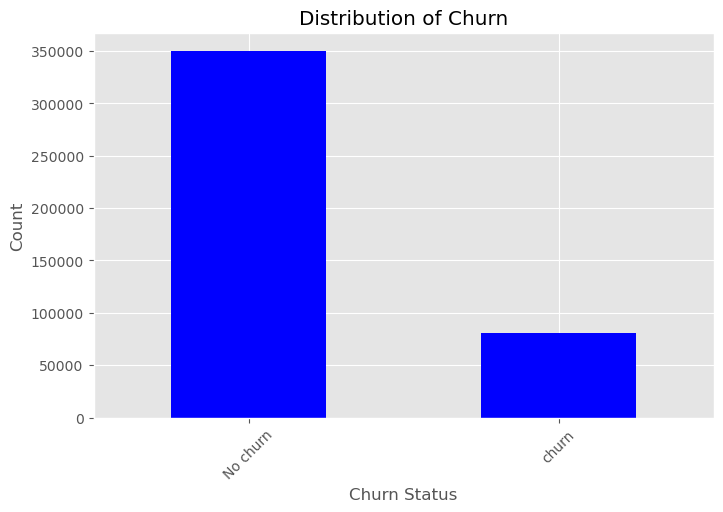

In [22]:
# visualize in a bar chart

churn_category_dist.plot(kind='bar', color='blue', figsize = (8, 5))
plt.xticks(rotation=45)
plt.title('Distribution of Churn')
plt.xlabel('Churn Status')
plt.ylabel('Count')
plt.show()

In [23]:
from sklearn.preprocessing import LabelEncoder

# Assuming 'Data' is your DataFrame
columns_to_encode=['CHURN']

# create a Label encoder instance
Label_encoder=LabelEncoder()

# Apply Label encoding to each categorical column
for column in columns_to_encode:
    sampled_df[column]=label_encoder.fit_transform(sampled_df[column])
    
# Display the updated DataFrame
print(sampled_df.head())

         user_id  REGION  TENURE  MONTANT  FREQUENCE_RECH  REVENUE  \
417912     83471       7       7  37000.0            21.0  38098.0   
1380278   276140      12       7   3500.0             7.0   3500.0   
657158    131213       0       7   3000.0             7.0   3000.0   
228934     45624       0       5   3000.0             7.0   3000.0   
2020145   404362       2       7  18100.0            16.0  18100.0   

         ARPU_SEGMENT  FREQUENCE  DATA_VOLUME  ON_NET  ORANGE   TIGO  ZONE1  \
417912        12699.0       26.0       1813.0  1323.0  1164.0  178.0    1.0   
1380278        1167.0        7.0        257.0    30.0    90.0    7.0    1.0   
657158         1000.0        9.0        257.0    27.0    29.0    6.0    1.0   
228934         1000.0        9.0        257.0    27.0    29.0    6.0    1.0   
2020145        6033.0       17.0        257.0   361.0   195.0    3.0    1.0   

         ZONE2  MRG  REGULARITY  TOP_PACK  FREQ_TOP_PACK  CHURN  
417912     2.0    0          62       

In [24]:
sampled_df.head()

,user_id,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK,CHURN
417912,83471,7,7,37000.0,21.0,38098.0,12699.0,26.0,1813.0,1323.0,1164.0,178.0,1.0,2.0,0,62,14,33.0,0
1380278,276140,12,7,3500.0,7.0,3500.0,1167.0,7.0,257.0,30.0,90.0,7.0,1.0,2.0,0,23,14,7.0,0
657158,131213,0,7,3000.0,7.0,3000.0,1000.0,9.0,257.0,27.0,29.0,6.0,1.0,2.0,0,24,14,5.0,1
228934,45624,0,5,3000.0,7.0,3000.0,1000.0,9.0,257.0,27.0,29.0,6.0,1.0,2.0,0,1,14,5.0,1
2020145,404362,2,7,18100.0,16.0,18100.0,6033.0,17.0,257.0,361.0,195.0,3.0,1.0,2.0,0,53,7,17.0,0


In [25]:
sampled_df.shape

(430810, 19)

## Feature Selection

In [26]:
# Select the target variable y
y=sampled_df['CHURN']

# Drop the target variable and create the independent variables
X=sampled_df.drop(['CHURN', 'user_id'],axis=1)

In [27]:
y.head()

417912     0
1380278    0
657158     1
228934     1
2020145    0
Name: CHURN, dtype: int32

In [28]:
X.head()

,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK
417912,7,7,37000.0,21.0,38098.0,12699.0,26.0,1813.0,1323.0,1164.0,178.0,1.0,2.0,0,62,14,33.0
1380278,12,7,3500.0,7.0,3500.0,1167.0,7.0,257.0,30.0,90.0,7.0,1.0,2.0,0,23,14,7.0
657158,0,7,3000.0,7.0,3000.0,1000.0,9.0,257.0,27.0,29.0,6.0,1.0,2.0,0,24,14,5.0
228934,0,5,3000.0,7.0,3000.0,1000.0,9.0,257.0,27.0,29.0,6.0,1.0,2.0,0,1,14,5.0
2020145,2,7,18100.0,16.0,18100.0,6033.0,17.0,257.0,361.0,195.0,3.0,1.0,2.0,0,53,7,17.0


## Oversampling using SMOTE(Synthetic Minority Over-sampling Technique)
SMOTE is a technique used to balance imbalanced datasets(target), where one class is significantly smaller than the other. It creates synthetic samples by creating new instances that are similar to the minority class. This helps prevent overfitting, which is a problem that can occur when using other techniques like ROS(Random Over Sampling).

In [29]:
from imblearn.over_sampling import SMOTE
from collections import Counter

# Instantiate SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)

# Resampled the data
X_resampled, y_resampled = smote.fit_resample(X, y)

# Print the class distribution before and after resampling
print('Class distribution before resampling: {}'.format(Counter(y)))
print('Class distribution after resampling: {}'.format(Counter(y_resampled)))

# from imblearn.over_sampling import SMOTE
# from collections import Counter

# # Set chunk size for processing large dataset
# chunk_size = 10000  # Adjust this value based on your available memory and dataset size

# # Instantiate SMOTE
# smote = SMOTE(sampling_strategy='auto', random_state=42)

# # Initialize empty arrays for resampled data
# X_resampled = np.empty((0, X.shape[1]))
# y_resampled = np.empty((0,))

# # Process dataset in chunks
# for i in range(0, len(X), chunk_size):
#     X_chunk = X[i:i+chunk_size]
#     y_chunk = y[i:i+chunk_size]
    
#     # Resample the chunk
#     X_chunk_resampled, y_chunk_resampled = smote.fit_resample(X_chunk, y_chunk)
    
#     # Concatenate resampled chunk with previous chunks
#     X_resampled = np.concatenate((X_resampled, X_chunk_resampled), axis=0)
#     y_resampled = np.concatenate((y_resampled, y_chunk_resampled), axis=0)

# # Print the class distribution before and after resampling
# print('Class distribution before resampling: {}'.format(Counter(y)))
# print('Class distribution after resampling: {}'.format(Counter(y_resampled)))

Class distribution before resampling: Counter({0: 350098, 1: 80712})
Class distribution after resampling: Counter({0: 350098, 1: 350098})


## Train-Test-Split
Split the dataset into training and testing sets.We will allocate a certain percentage of 80-20 for training and testing respectively.This will be done using the train_test_split function from Scikit-learn

In [30]:
# Import Library
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=30)

print('\n',X_train.head(2))
print('\n',X_test.head(2))
print('\n',y_train.head(2))
print('\n',y_test.head(2))


          REGION  TENURE  MONTANT  FREQUENCE_RECH  REVENUE  ARPU_SEGMENT  \
1293170       7       7   3000.0             7.0    425.0         142.0   
1658162       0       7  10000.0            30.0   9992.0        3331.0   

         FREQUENCE  DATA_VOLUME  ON_NET  ORANGE  TIGO  ZONE1  ZONE2  MRG  \
1293170        5.0        257.0     3.0    29.0   6.0    1.0    2.0    0   
1658162       34.0      14511.0     2.0     9.0   2.0    1.0    0.0    0   

         REGULARITY  TOP_PACK  FREQ_TOP_PACK  
1293170          16        79            1.0  
1658162          58        36           12.0  

          REGION  TENURE  MONTANT  FREQUENCE_RECH  REVENUE  ARPU_SEGMENT  \
1312908       3       7   5800.0            11.0   5800.0        1933.0   
687546        0       7   4750.0            10.0   5241.0        1747.0   

         FREQUENCE  DATA_VOLUME  ON_NET  ORANGE  TIGO  ZONE1  ZONE2  MRG  \
1312908       11.0          0.0    28.0   118.0   6.0    1.0    2.0    0   
687546        11.0    

In [31]:
print(f'The X_train shape: {X_train.shape}')
print(f'The X_test shape: {X_test.shape}')
print(f'The y_train shape: {y_train.shape}')
print(f'The y_test shape: {y_test.shape}')

The X_train shape: (344648, 17)
The X_test shape: (86162, 17)
The y_train shape: (344648,)
The y_test shape: (86162,)


## MinMax Scaler
This method scales the data to a fixed range, usually between 0 and 1. It can be implemented using the MinMaxScaler class from the sklearn.preprocessing module.

In [32]:
from sklearn.preprocessing import MinMaxScaler
# Create an instance of MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler on the training features
scaler.fit(X_train)

# Transform the training and test features
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Model Selection

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn import metrics

# for hyperparameter tuning using k-fold cross validation
from sklearn.model_selection import cross_val_score, cross_val_predict

## Model Training

## Logistic Regression

In [34]:
lr_model = LogisticRegression()
lr_model.fit(X_train_scaled, y_train)
lr_probs = lr_model.predict_proba(X_test_scaled)[:, 1]

In [35]:
# Import library
from sklearn.metrics import accuracy_score

# create predictions
y_pred = lr_model.predict(X_test_scaled)

# print accuracy score for Logistic Regression
print(f'The accuracy of the logistic regression is {accuracy_score(y_pred, y_test).round(3)*100} ' + '%')

The accuracy of the logistic regression is 86.7 %


In [36]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def metrics_calculator(y_true, y_pred, model_name):
    '''
    Calculates and return a dictionary of performance metrics for a binary classification model
    '''
    # Calculate performance metrics
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)

    # Create a dictionary of results
    results = {'Model': model_name, 'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1-Score': f1}
    return results

lr_result = metrics_calculator(y_test, y_pred, 'lr_model')
lr_result

{'Model': 'lr_model',
 'Accuracy': 0.8670759731668253,
 'Precision': 0.6422002017444965,
 'Recall': 0.6661947556321556,
 'F1-Score': 0.6539774615547298}

## Decision Tree

In [37]:
# Create an instance of DecisionTreeClassifier
dt_model = DecisionTreeClassifier()

# Fit the model on the scaled training
dt_model.fit(X_train_scaled, y_train)
dt_probs = dt_model.predict_proba(X_test_scaled)[:, 1]

In [38]:
# Predict the classes of the testing data
y_pred = dt_model.predict(X_test_scaled)

# print accuracy score for DecisionTree Classifier
print(f'The accuracy of the DecisionTree is {accuracy_score(y_pred, y_test).round(3)*100} ' + '%')

The accuracy of the DecisionTree is 84.8 %


In [39]:
dt_result = metrics_calculator(y_test, y_pred, 'dt_model')
dt_result

{'Model': 'dt_model',
 'Accuracy': 0.8478679696385878,
 'Precision': 0.590058546665136,
 'Recall': 0.6327711436661332,
 'F1-Score': 0.6106688844006177}

Logistic Regression Classification Report:
              precision    recall  f1-score   support

    No churn      0.922     0.914     0.918     69916
       churn      0.642     0.666     0.654     16246

    accuracy                          0.867     86162
   macro avg      0.782     0.790     0.786     86162
weighted avg      0.869     0.867     0.868     86162



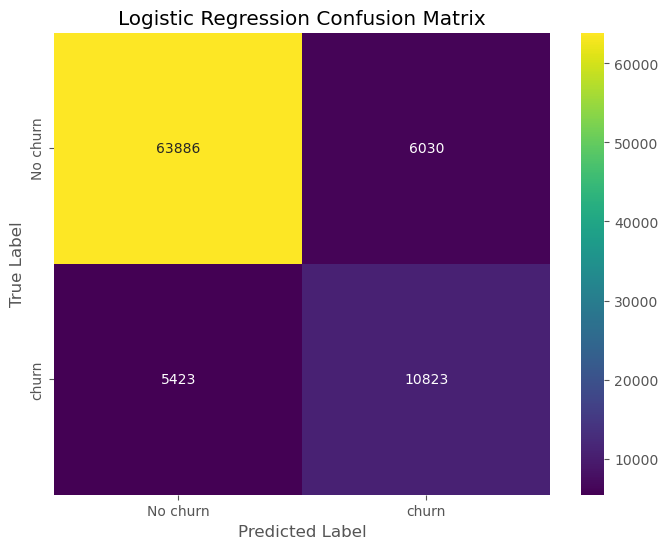

Decision Tree Classification Report:
              precision    recall  f1-score   support

    No churn      0.913     0.898     0.905     69916
       churn      0.590     0.633     0.611     16246

    accuracy                          0.848     86162
   macro avg      0.752     0.765     0.758     86162
weighted avg      0.852     0.848     0.850     86162



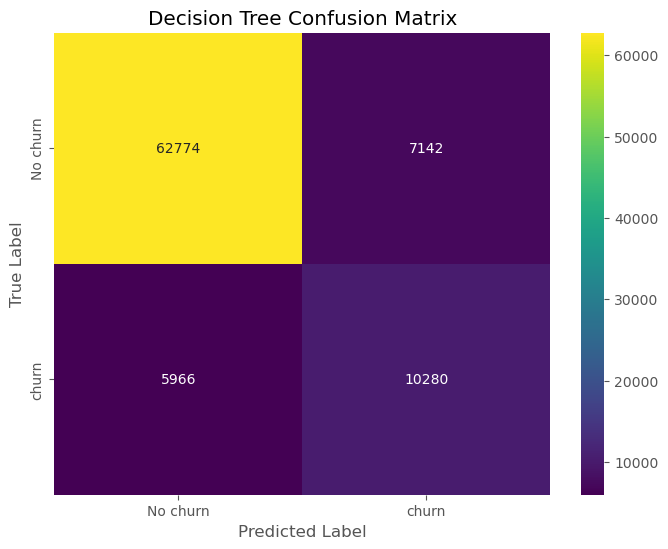

In [40]:
from sklearn.metrics import confusion_matrix, classification_report
# import seaborn as sns
# import matplotlib.pyplot as plt

# Create a list of models and their corresponding names
models = [lr_model, dt_model]
model_names = ['Logistic Regression', 'Decision Tree']

# Set the labels
labels = ['No churn', 'churn']

# Set the desired number of decimal places
decimal_places = 3

# Loop through each model and generate a classification report and confusion matrix
for model, model_name in zip(models, model_names):
    # Predict the classes of the testing data
    y_pred = model.predict(X_test_scaled)
    
    # Generate the classification report with the specified number of decimal places
    report = classification_report(y_test, y_pred, target_names=labels, digits=decimal_places)
    print(f'{model_name} Classification Report:\n{report}')
    
    # Compute confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    # Plot the confusion matrix as a heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, cmap='viridis', fmt='d', xticklabels=labels, yticklabels=labels)
    plt.title(f'{model_name} Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

In [41]:
# Concatenate results into a single dataframe all the model metric calculator results
results_df = pd.DataFrame([lr_result,dt_result])
results_df

,Model,Accuracy,Precision,Recall,F1-Score
0,lr_model,0.867076,0.642200,0.666195,0.653977
1,dt_model,0.847868,0.590059,0.632771,0.610669


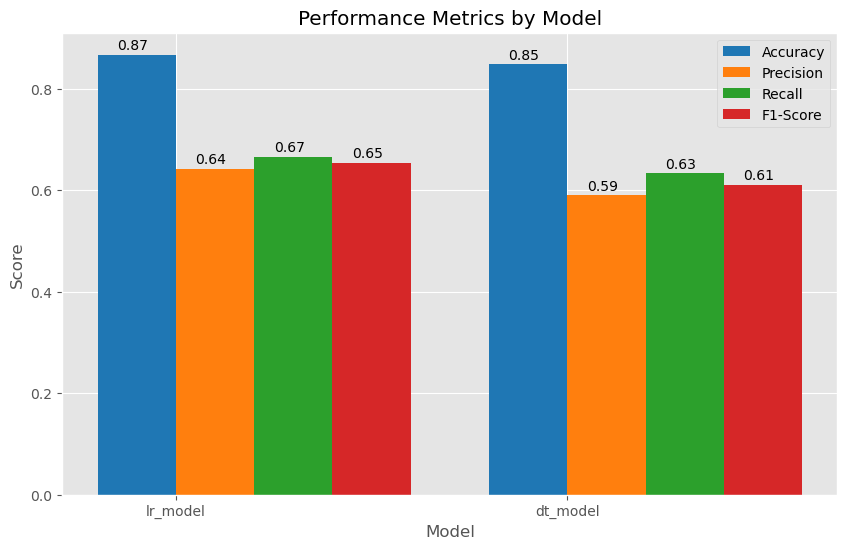

In [42]:
# Set the figure size
plt.figure(figsize=(10, 6))

# Set the width of the bars
bar_width = 0.2

# Create a bar chart of the metrics for each model
models = results_df['Model']
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']

for i, metric in enumerate(metrics):
    plt.bar(np.arange(len(models)) + i * bar_width, results_df[metric], width=bar_width, color=colors[i], label=metric)
    for j, value in enumerate(results_df[metric]):
        plt.text(j + i * bar_width - 0.05, value + 0.01, '{:.2f}'.format(value))

# Add labels and legend
plt.xlabel('Model')
plt.ylabel('Score')
plt.title('Performance Metrics by Model')
plt.xticks(np.arange(len(models)) + bar_width / 2, models)
plt.legend()

# Show the chart
plt.show()


## AUC-ROC
The AUC-ROC scores of the models to their accuracy score and confusion matrices can be used to get a complete picture of each model's performance. The AUC-ROC score measures the overall performance of a binary classifier, taking into account bith true positive rate and false positive rate. The higher the AUC-ROC score, the better the model's ability to distinguish between positive and negative classes. Therefore, a model with a higher AUC-ROC score is generally considered to be better than a model with a lower score.

In [43]:
# Calculate the AUC-ROC for logistic regression
lr_auc = roc_auc_score(y_test, lr_probs)

# Calculate the AUC-ROC for decision tree
dt_auc = roc_auc_score(y_test, dt_probs)

# Print the AUC-ROC scores
print(f'Logistic Regression AUC-ROC: {lr_auc:.2f}')
print(f'Decision Tree AUC-ROC: {dt_auc:.2f}')

Logistic Regression AUC-ROC: 0.91
Decision Tree AUC-ROC: 0.83


In summary, all models have strong discrimination abilities as indicated by their high AUC-ROC scores. However, logistic regression exhibit better discrimination abilities compared to Decision Tree, with AUC-ROC scores of 0.91. These scores imply that the logistic regression is highly reliable for predicting churn based on the provided data.

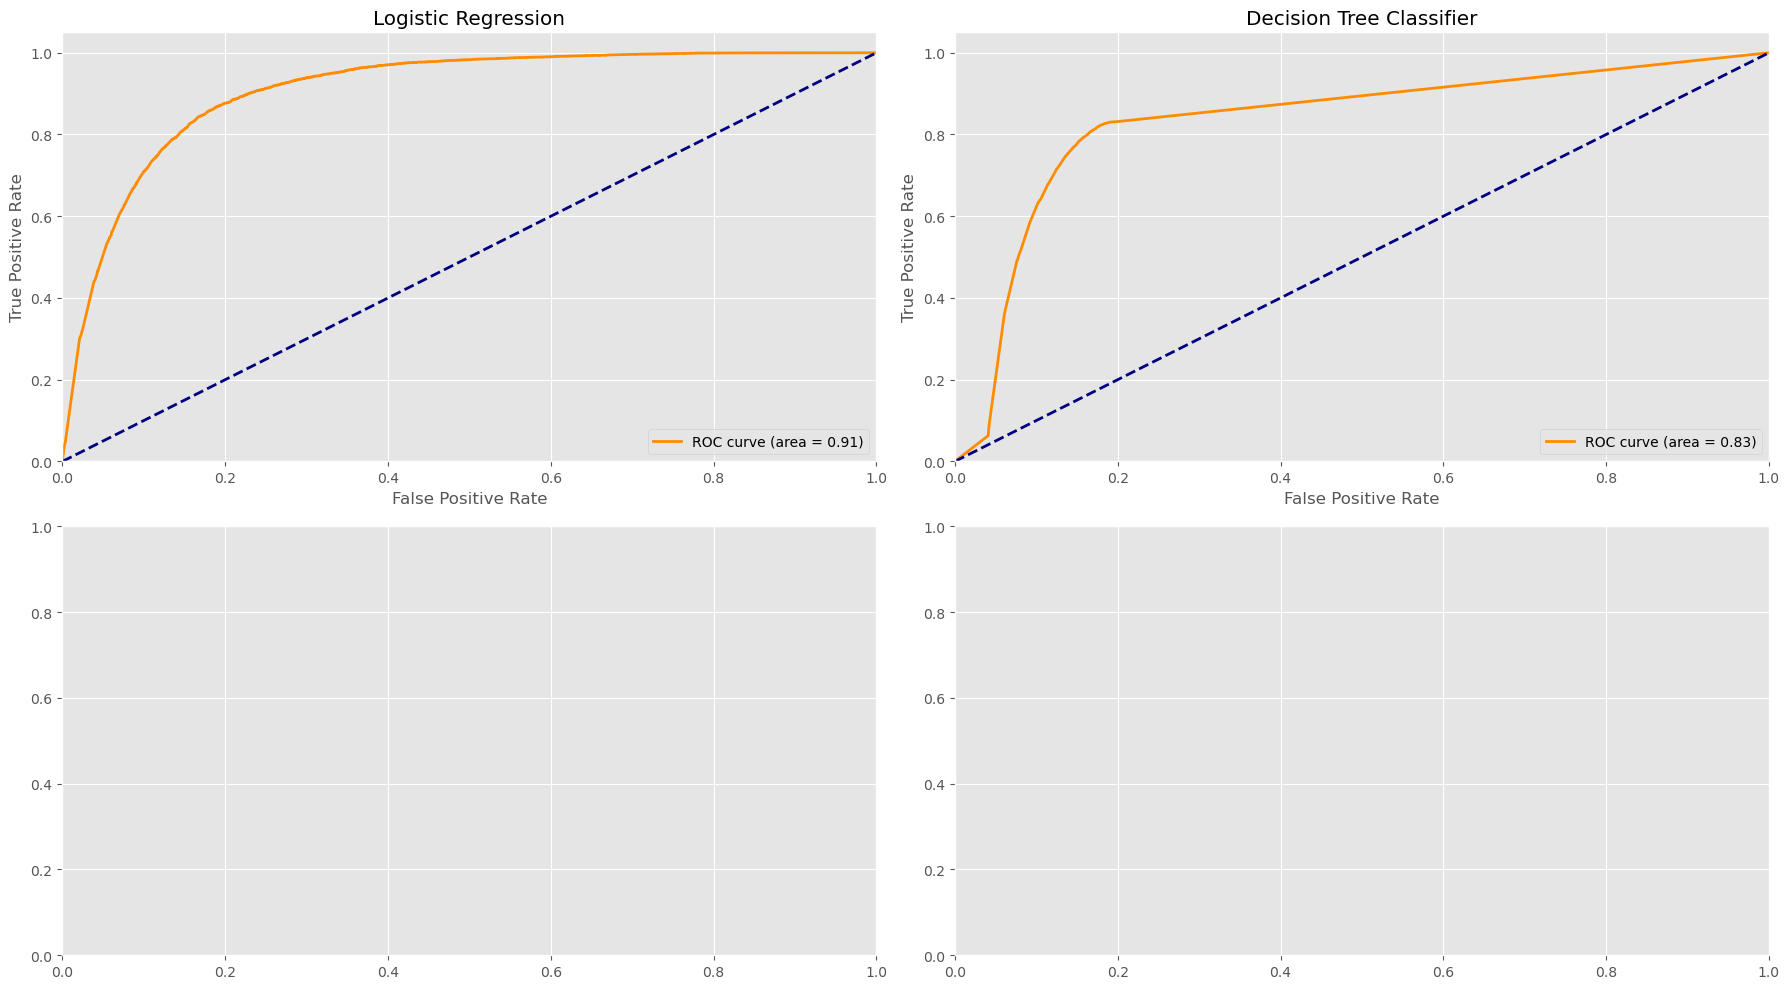

In [44]:
from sklearn.metrics import roc_curve, auc

# Define the models and their names
models = [lr_model, dt_model]
model_names = ['Logistic Regression', 'Decision Tree Classifier']

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(18, 10))
axes = axes.flatten()

# Plot ROC curve and score for each model
for i, (model, name) in enumerate(zip(models, model_names)):
    fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test_scaled)[:, 1])
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    axes[i].plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
    axes[i].plot([0,1], [0,1], color='navy', lw=2, linestyle='--')
    axes[i].set_xlim([0, 1])
    axes[i].set_ylim([0, 1.05])
    axes[i].set_xlabel('False Positive Rate')
    axes[i].set_ylabel('True Positive Rate')
    axes[i].set_title(name)
    axes[i].legend(loc='lower right')

# Adjust spacing between subplots
plt.tight_layout()

# Show the chart
plt.show()

## Feature Engineering

After training the best performing model which is logistic Regression Model, We will analyze feature importance. For example, we will use Random Forest Classifier model to check feature importances as follows:

Random Forest classifier is often used for feature importances because it has several advantages over other model classifiers in this context. Here are a few reasons:

Ensemble Method: Random Forest is an ensemble method that combines multiple decision trees to make predictions. Each tree in the forest is trained on a subset of the data and a random subset of the features. By combining the results of multiple trees, Random Forest can capture complex relationships between features and the target variable, making it well-suited for assessing feature importances.

Feature Selection: Random Forest naturally performs feature selection by evaluating the importance of each feature in reducing the impurity or increasing the homogeneity of the target variable across all the trees in the forest. This makes it a good choice for identifying the most important features in a dataset.

Robustness: Random Forest is known for its robustness to overfitting and noise in the data. This means that the feature importances obtained from a Random Forest model are generally more reliable and less sensitive to outliers or noisy data points.

Handling Correlated Features: Random Forest can effectively handle correlated features, which is a common scenario in real-world datasets. This makes it a suitable choice for determining feature importances in datasets with multicollinearity.

While Random Forest is commonly used for feature importances, other model classifiers such as Gradient Boosting Machines and XGBoost also provide feature importance scores. However, Random Forest remains popular for this purpose due to its ease of use, robustness, and ability to handle a wide range of data characteristics.

In [45]:
# Feature importances using Random Forest
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest classifier object
rf_classifier = RandomForestClassifier()

# Fit the classifier to your training data
rf_classifier.fit(X_train_scaled, y_train)

# Get feature importances from the trained classifier
feature_importances = rf_classifier.feature_importances_

# Display feature importances alongside feature names
feature_names = X.columns
feature_importances_dict = dict(zip(feature_names, feature_importances))
sorted_feature_importance = sorted(feature_importances_dict.items(), key=lambda x: x[1], reverse=True)


for feature, importance in sorted_feature_importance:
    print(f'{feature}: {importance:.2f}')

REGULARITY: 0.34
REGION: 0.11
REVENUE: 0.10
ARPU_SEGMENT: 0.08
DATA_VOLUME: 0.07
ON_NET: 0.06
FREQUENCE: 0.05
MONTANT: 0.04
TOP_PACK: 0.04
ORANGE: 0.04
FREQUENCE_RECH: 0.03
TIGO: 0.02
FREQ_TOP_PACK: 0.02
TENURE: 0.01
ZONE1: 0.01
ZONE2: 0.00
MRG: 0.00


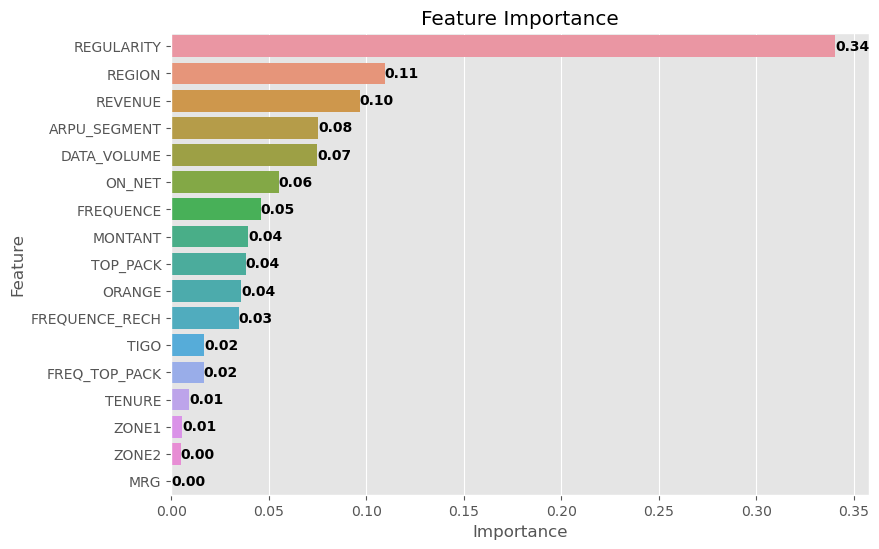

In [46]:
# Create a DataFrame to store feature names and their importances
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Sort features by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances as a bar chart
plt.figure(figsize=(9, 6))
ax = sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')

# Annotate the bars with the importance values
for i, v in enumerate(feature_importance_df['Importance']):
    ax.text(v, i, f'{v:.2f}', color='black', va='center', fontsize=10, fontweight='bold')

plt.show()

## A Bit of Feature Selection

In [47]:
# split into training and validation set using 30-70 split ratio
X_train, X_valid, y_train, y_valid = train_test_split(X_resampled, y_resampled, test_size=0.3)
X_train2 = X_train[['REGULARITY', 'REGION', 'REVENUE', 'ARPU_SEGMENT', 'MONTANT', 'DATA_VOLUME']]
X_valid2 = X_valid[['REGULARITY', 'REGION', 'REVENUE', 'ARPU_SEGMENT', 'MONTANT', 'DATA_VOLUME']]

In [48]:
# Since Logistic Regression model is the best performing model

# fit the model on the new training set
lr_model.fit(X_train2, y_train)

# predit on the new testing set
y_valid2_pred = lr_model.predict(X_valid2)

In [49]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_valid2_pred, y_valid)
print(f'Accuracy Score: {accuracy:.2f}')

Accuracy Score: 0.83


In [50]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate accuracy
accuracy = accuracy_score(y_valid2_pred, y_valid)
print(f'Accuracy Score: {accuracy:.2f}')

# Calculate precision
precision = precision_score(y_valid2_pred, y_valid)
print(f'Precision Score: {precision:.2f}')

# Calculate recall
recall = recall_score(y_valid2_pred, y_valid)
print(f'Recall Score: {recall:.2f}')

# Calculate F1-score
f1 = f1_score(y_valid2_pred, y_valid)
print(f'F1-score: {f1:.2f}')


Accuracy Score: 0.83
Precision Score: 0.91
Recall Score: 0.79
F1-score: 0.84


In [54]:
import os
import pickle
import streamlit as st

# Print the current working directory
print("Current working directory:", os.getcwd())

# Loading the trained model
pickle_in = open("classifier.pkl", 'rb')
classifier = pickle.load(pickle_in)

# Defining the function to make predictions using the user input
@st.cache()
def prediction(REGION, REGULARITY, REVENUE, ARPU_SEGMENT, MONTANT):

    # Pre-processing User input
    if REGION == "Urban":
        REGION = 0
    else: 
        REGION = 1

    # Making Predictions
    prediction = classifier.predict([[REGION, REGULARITY, REVENUE, ARPU_SEGMENT, MONTANT]])

    if prediction[0] == 0:
        pred = "Not Churned"
    else:
        pred = "Churned"

    return pred

# Main function to define the Streamlit web app
def main():
    # Front end elements of the web page
    html_temp = '''
    <div style='background-color: yellow; padding:13px'>
    <h1 style='color: black; text-align: center;'>Churn Prediction ML App</h1>
    </div>
    '''

    # Display the front end aspect
    st.markdown(html_temp, unsafe_allow_html=True)

    # Input fields for user data
    REGIONS = ["Dakar", "Saint-Louis", "Louga", "Kaolack", "Diourbel", "Tambacounda", "Kaffrine", "Kolda",
                            "Fatick", "Matam", "Ziguinchor", "Sedhiou", "Kedougou"]
    REGION = st.selectbox('Region', REGIONS)
    REGULARITY = st.number_input("Regular Monthly Activity")
    REVENUE = st.number_input("Total Revenue")
    ARPU_SEGMENT = st.number_input("Average Revenue Per User")
    MONTANT = st.number_input("Total Amount")

    result = ""

    # When 'Predict' is clicked, make prediction and display the result
    if st.button("Predict"):
        result = prediction(REGION, REGULARITY, REVENUE, ARPU_SEGMENT, MONTANT)
        st.success("Customer is {}".format(result))

if __name__ == '__main__':
    main()


Current working directory: C:\Users\josep\OneDrive\Desktop\GoMyCode\Python


2024-03-21 01:36:53.051 
  command:

    streamlit run C:\Users\josep\anaconda3\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]


In [ ]:
# from pyngrok import ngrok

# # Set your ngrok authentication token
# ngrok.set_auth_token('2dDbjYYyY4pLejo8KTN5EqL1hri_5NecrBesVNEP8Sk6RHGut')

# # Connect to ngrok with authentication
# public_url = ngrok.connect(8501)
# public_url